 This Notebook reads dataset  results from every Premier League match from 1993-1994 to 2017-2018. It also includes half time results, but only from 1995-96 to 2017-18. Columns include Division (denoted as E0), HomeTeam, AwayTeam, FTHG (final time home goals), FTAG (final time away goals), FTR (full time result), HTHG (half time home goals), HTAG (half time away goals), HTR (half time result), and season.

 Data compiled into one file from this site: http://www.football-data.co.uk/englandm.php


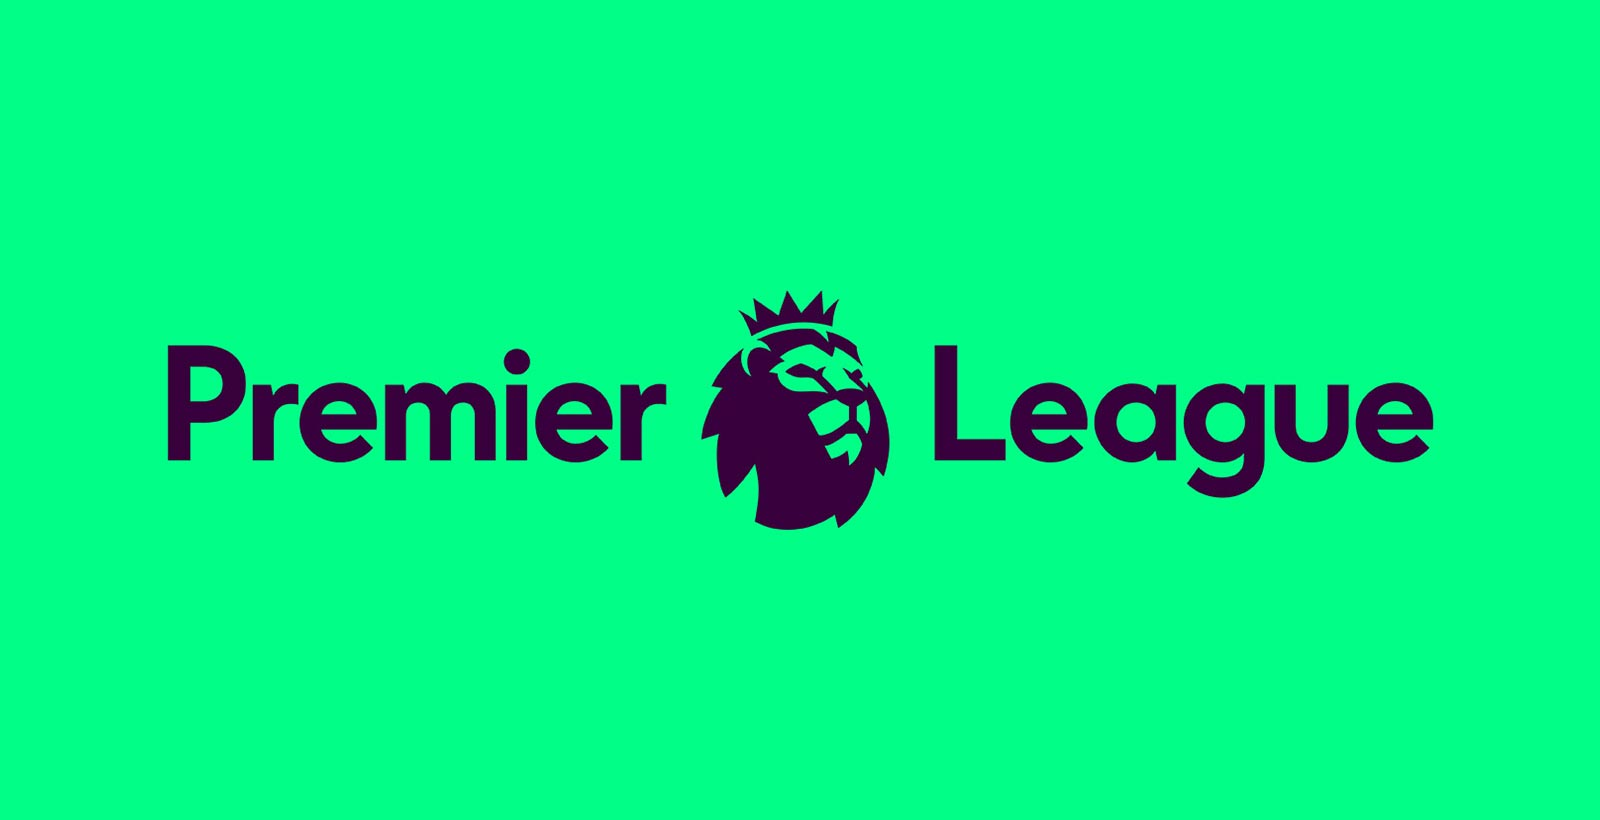

In [389]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [217]:
# Read the dataset
epl_df = pd.read_csv('./EPL_Set.csv')

In [218]:
#Data set columns
epl_df.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,NaN,NaN,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,1993-94


In [219]:
# Changing datatypes

epl_df["Season"] = epl_df["Season"].astype('str')
epl_df["HomeTeam"] = epl_df["HomeTeam"].astype('category')
epl_df["AwayTeam"] = epl_df["AwayTeam"].astype('category')
epl_df["FTHG"] = epl_df["FTHG"].astype(int)
epl_df["FTAG"] = epl_df["FTAG"].astype(int)
epl_df["FTR"] = epl_df["FTR"].astype('category')
epl_df["HTHG"] = epl_df["HTHG"].astype(float)
epl_df["HTAG"] = epl_df["HTAG"].astype(float)
epl_df["HTR"] = epl_df["HTR"].astype('category')

# General Stats 

In [214]:
epl_home = epl_df.HomeTeam.value_counts(dropna=True)

In [213]:
epl_away = epl_df.AwayTeam.value_counts(dropna=True)

## Which team played the most games since 1993 in the Premier League ?

In [215]:
#total games played by each team is the sum of home + away games 
epl_total_games = epl_home + epl_away


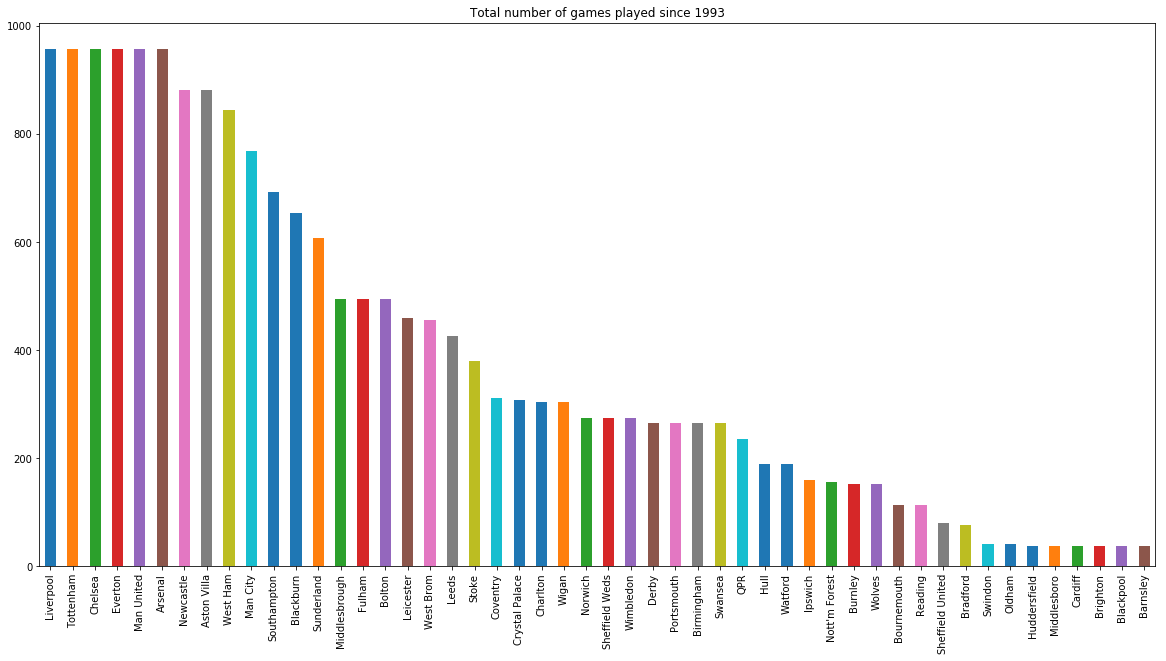

In [216]:
epl_total_games.plot(kind = "bar", title= 'Total number of games played since 1993', figsize = (20,10))

**From the graph above, we can tell Chelsea, Everton, Arsenal, Tottenham, Liverpool, Man United played most games and we can infer that these teams were never relegated since 1996**

## Which team has the highest number homegoals ?

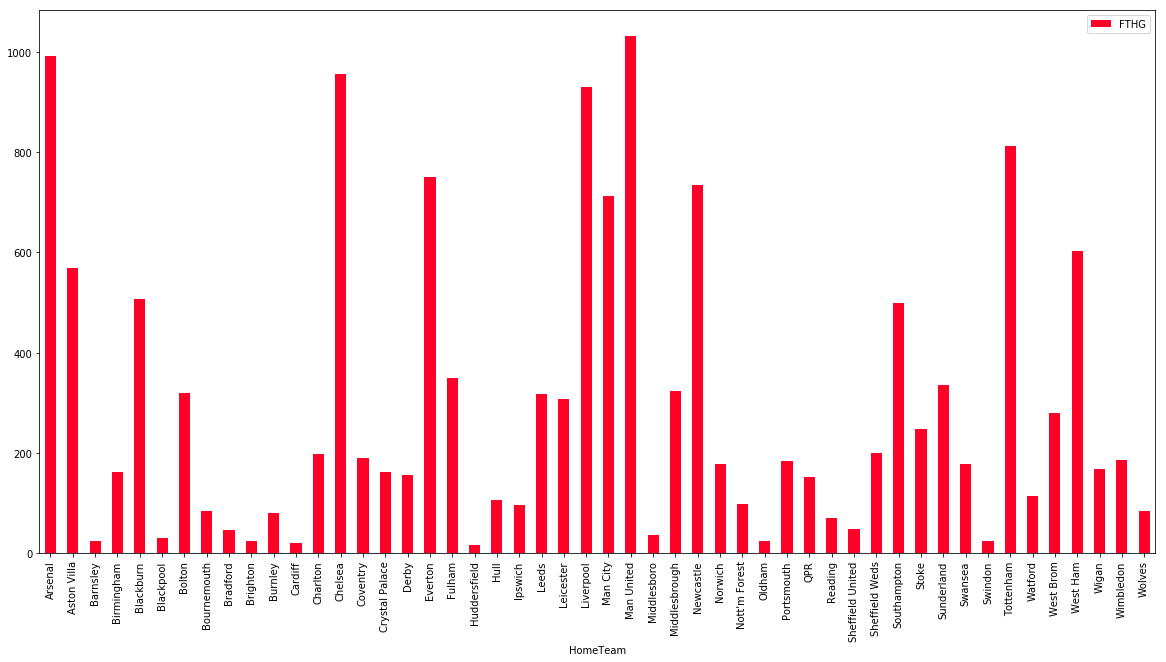

In [13]:
epl_df[['HomeTeam','FTHG']].groupby('HomeTeam').sum().plot(kind = 'bar', figsize =(20,10), colormap= 'gist_rainbow')

**From the graph above Manchester United scored most home goals since 1993**

## Which team has the highest number of awaygoals since 1993?

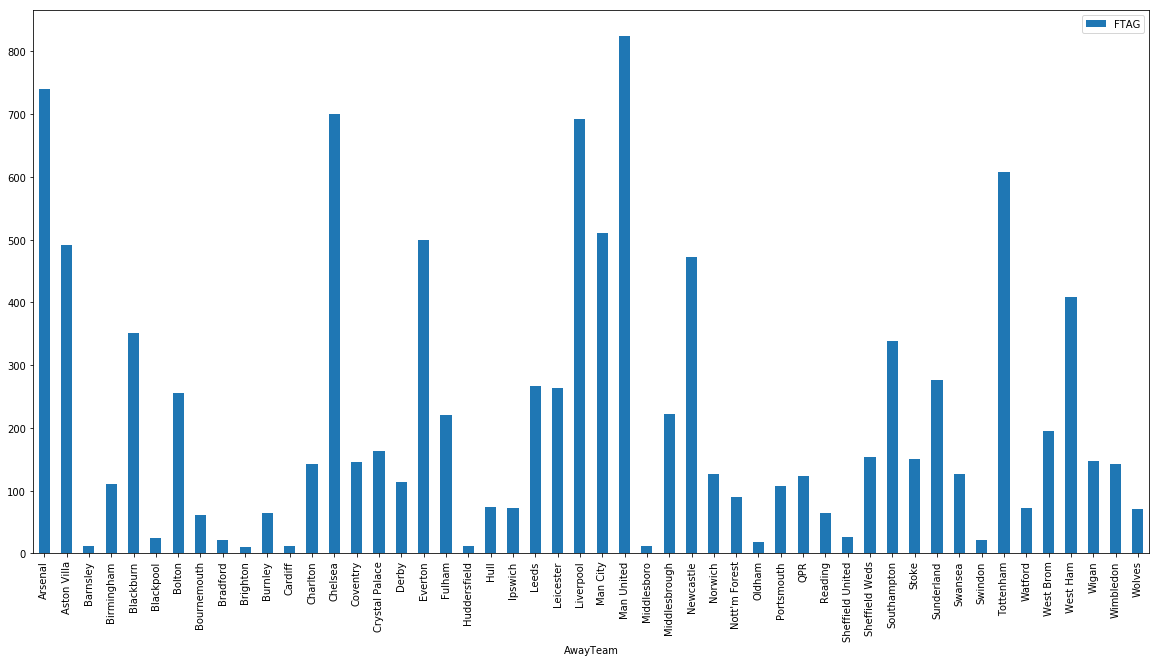

In [14]:
epl_df[['AwayTeam', 'FTAG']].groupby('AwayTeam').sum().plot(kind = 'bar', figsize = (20,10))

**From the above graph we can tell that Manchester United scored the most away goals**

## Which season did Man United score highest number of home goals ?

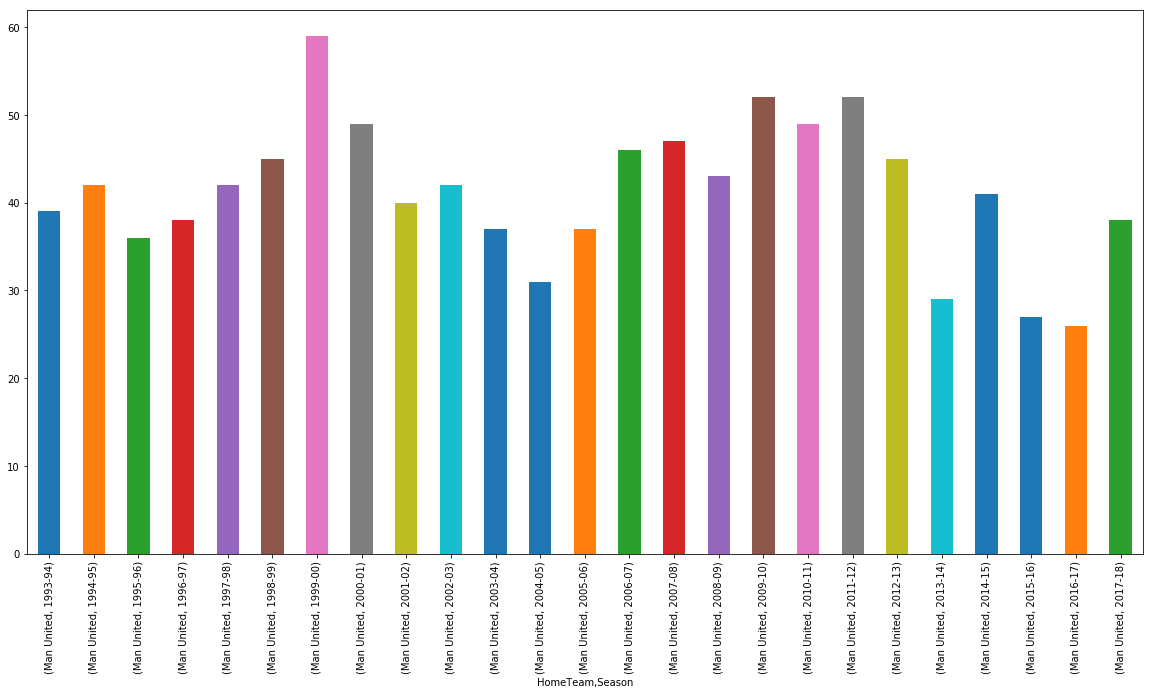

In [225]:
man_untd_home = epl_df.loc[epl_df['HomeTeam'] == 'Man United']
man_untd_home.groupby(['HomeTeam', 'Season']).FTHG.sum().plot(kind = 'bar', figsize = (20,10))

**From the above diagram, Manchester United scored 60 homegoals in 1999-2000 Season which is the highest from 1993-2018**

## Which season did Man United score highest number of away goals ?

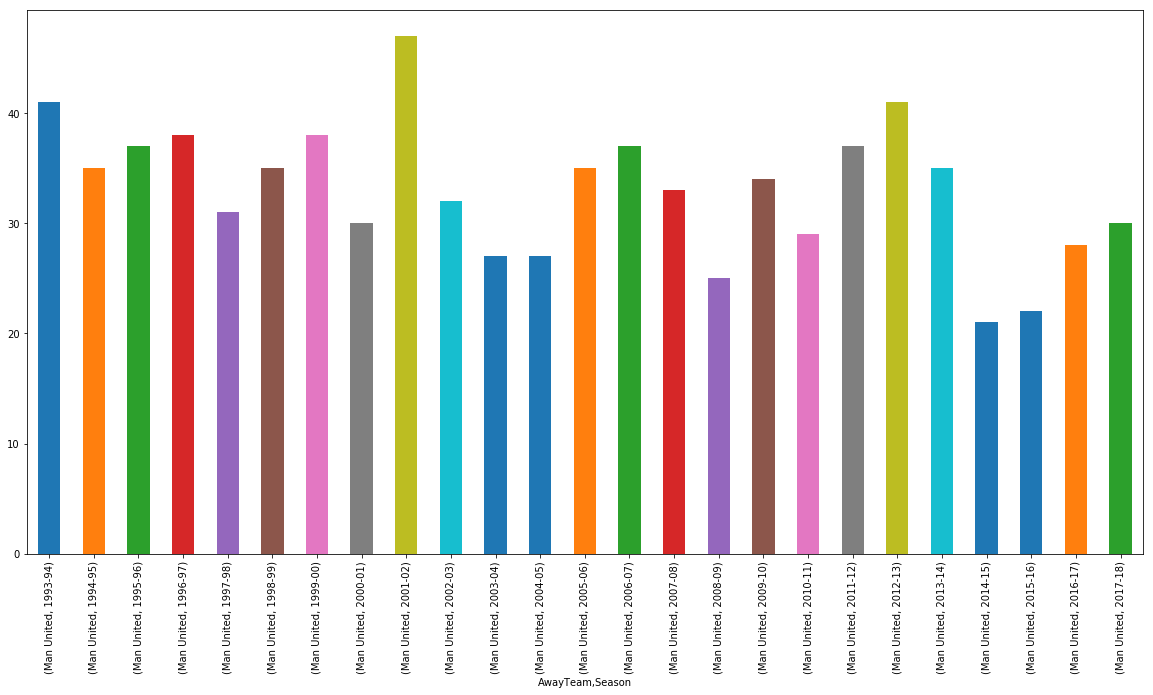

In [16]:
man_untd_away = epl_df.loc[epl_df['AwayTeam'] == 'Man United']
manu_away_goals = man_untd_away.groupby(['AwayTeam', 'Season']).FTAG.sum()
manu_away_goals.plot(kind = 'bar', figsize = (20,10))

**From the above graph, Manchester United scored 47 Away goals in 1999-2000 season.**

## Which team has the most home goals in all seasons ?

FTHG    1032
dtype: int64

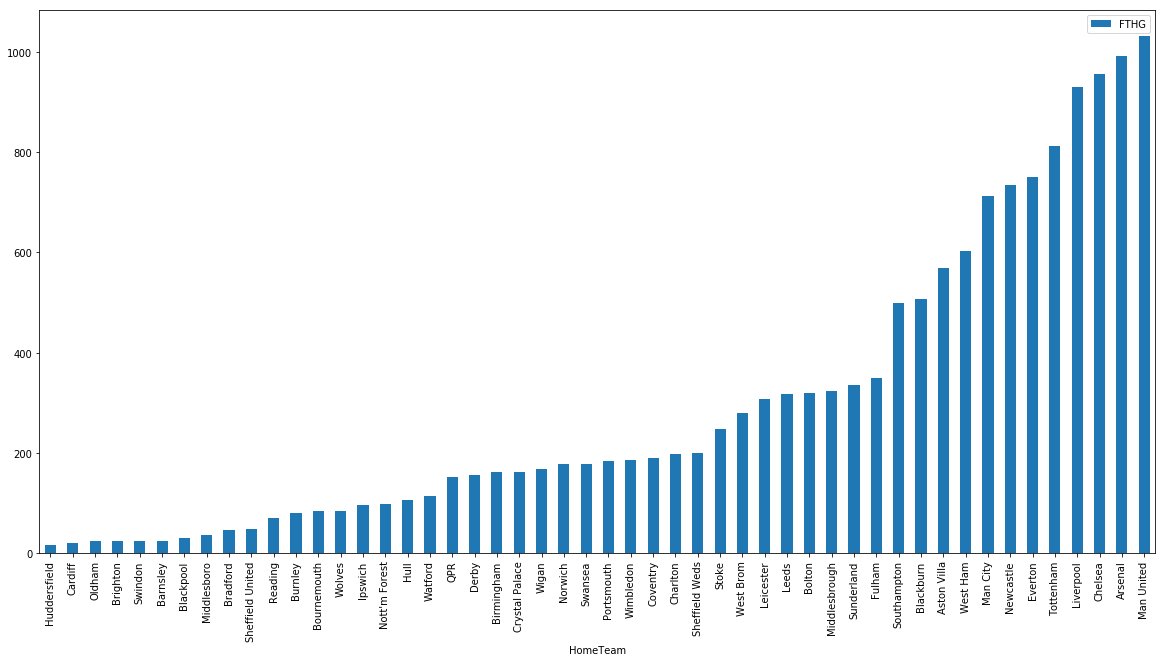

In [18]:
home_games = epl_df[['HomeTeam', 'Season','FTHG']]
home_games.groupby('HomeTeam').sum().sort_values(by='FTHG', ascending=True).plot(kind='bar', figsize = (20,10))
home_games.groupby('HomeTeam').sum().max()

**Manchester United scored 1032 home goals between 1993-2018, highest amongst all teams !**

## Which team scored the most away goals?

FTAG    825
dtype: int64

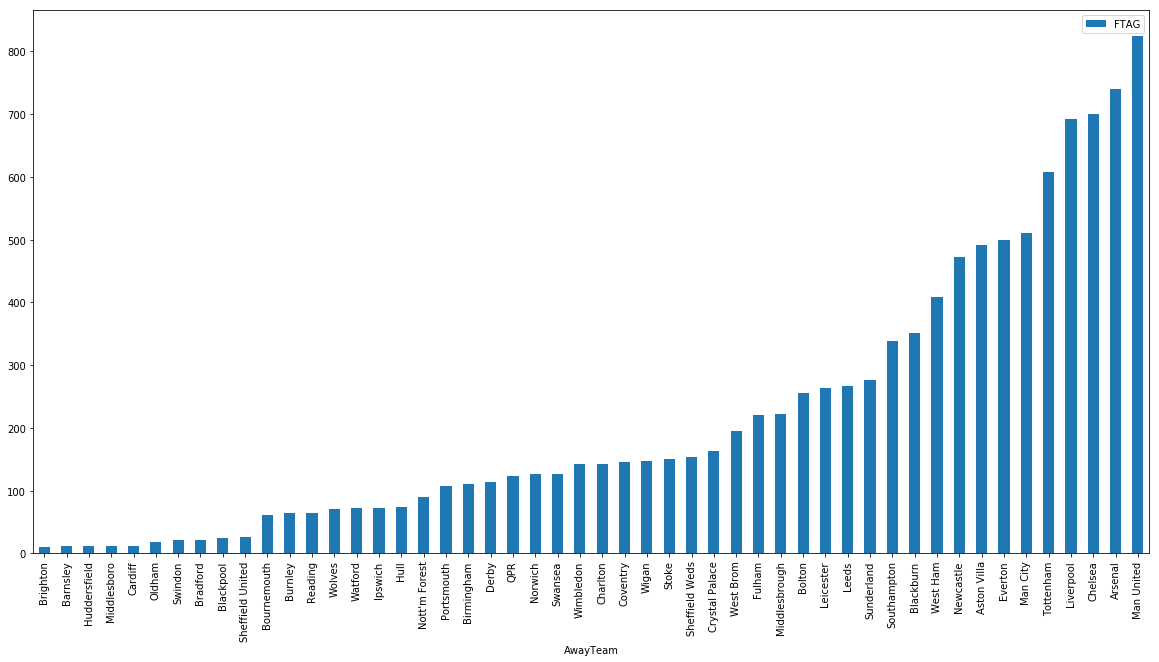

In [19]:
away_games = epl_df[['AwayTeam', 'Season','FTAG']]
away_games.groupby('AwayTeam').sum().sort_values(by='FTAG', ascending=True).plot(kind='bar', figsize = (20,10))
away_games.groupby('AwayTeam').sum().max()

**Manchester United scored 825 away goals between 1993 and 2018, highest amongst all teams !**

## Total home wins per team from 1993 to 2018

FTR    349
dtype: int64

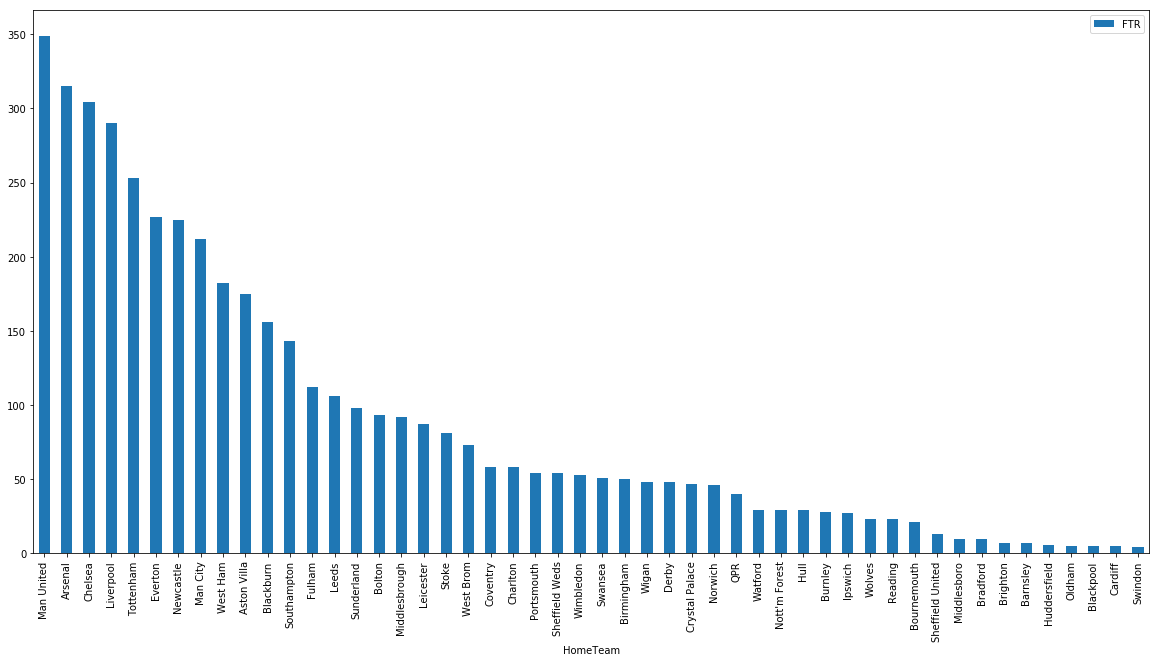

In [20]:
total_home_wins  = epl_df[(epl_df['FTR'] == 'H')]
total_home_wins = total_home_wins.sort_values(by='HomeTeam')
total_home_wins = total_home_wins[['HomeTeam','FTR']]
total_home_wins = total_home_wins.replace('H',1)
total_home_wins.groupby('HomeTeam').sum().sort_values(by = 'FTR',ascending=False).plot(kind = 'bar', figsize = (20,10))
total_home_wins.groupby('HomeTeam').sum().max()

**From the data above Manchester United has won 349 times at home, highest amongst the other teams !**

## Total away wins per team from 1993 to 2018

FTR    256
dtype: int64

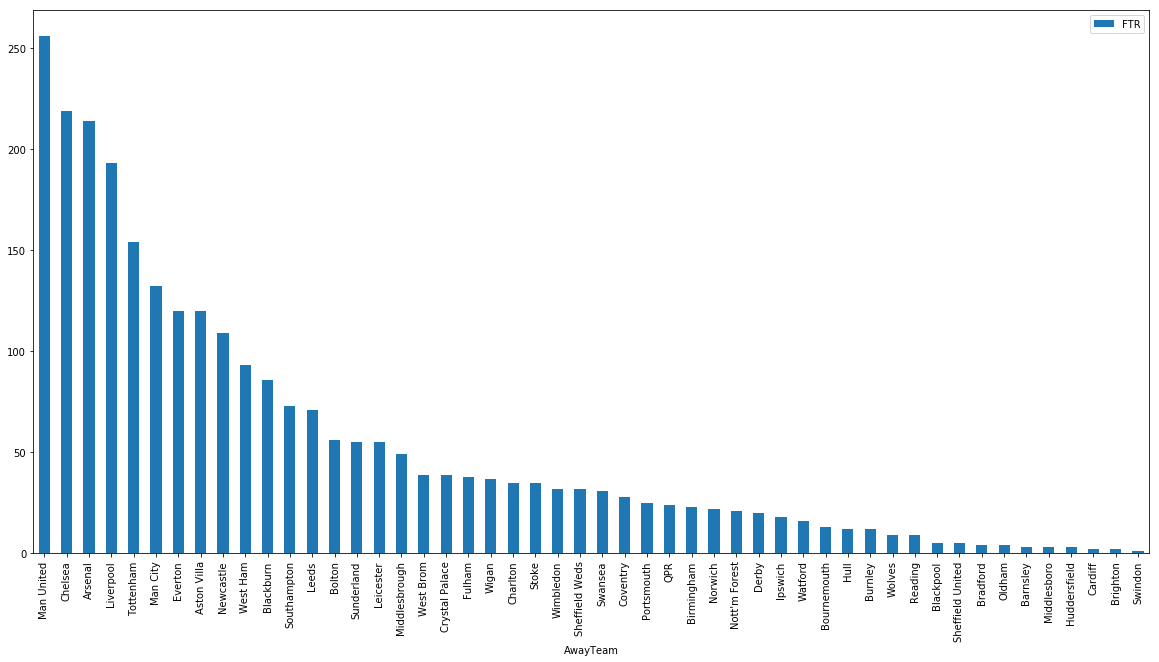

In [21]:
total_away_wins = epl_df[epl_df['FTR'] == 'A']
total_away_wins = total_away_wins[['AwayTeam','Season','FTR']]
total_away_wins = total_away_wins.sort_values(by='AwayTeam')
total_away_wins = total_away_wins.replace('A',1)
total_away_wins.groupby('AwayTeam').sum().sort_values(by='FTR', ascending=False).plot(kind = 'bar', figsize = (20,10))
total_away_wins.groupby('AwayTeam').sum().max()

**From the data above Manchester United has won 249 times away, highest amongst the other teams !**

## Which team won the most titles ?

In [334]:
# Add a new Winner Column to epl_df that stores the winner of the game
np_array_epl = [epl_df['HomeTeam'], epl_df['AwayTeam'],'Draw']
np_condition_epl = [epl_df['FTR'] == 'H', epl_df['FTR'] == 'A', epl_df['FTR'] == 'D']

epl_df['Winner'] = np.select(np_condition_epl, np_array_epl)
epl_df.head()


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94,Coventry
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94,Aston Villa
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94,Blackburn
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94,Liverpool
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94,Draw


,Team,Title_Count
0,Man United,11
1,Chelsea,5
2,Arsenal,4
3,Man City,3
4,Blackburn,1
5,Leicester,1


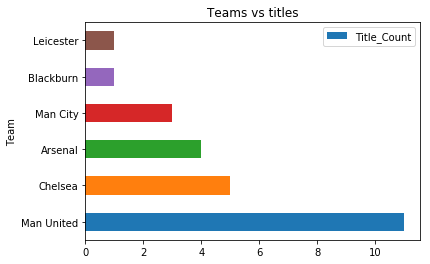

In [519]:
winner_count = epl_df.loc[:,['Season', 'Winner']]
winner_count = winner_count.groupby(['Season', 'Winner']).size().reset_index(name='Counts')
winner_count = winner_count.sort_values(by = ['Season','Counts'], ascending=[True, False])
winner_count = winner_count[winner_count['Winner']!= 'Draw']

most_wins = winner_count.groupby('Season').head(1)

most_titles = most_wins['Winner'].value_counts().reset_index()
most_titles.columns = ['Team','Title_Count']
most_titles.plot(kind = 'barh', x = 'Team', y= 'Title_Count', title = 'Teams vs titles')
most_titles

**From the data above Manchester United won most titles between 1993 and 2018**

## Teams playing Home has a higher probability of winning ?

In [552]:
epl_home_wins = epl_df[epl_df['FTR'] == 'H']
epl_home_wins = epl_home_wins.HomeTeam.value_counts().reset_index()
epl_home_wins.columns = ['Team', 'Home_wins']
epl_home_wins.head()

,Team,Home_wins
0,Man United,349
1,Arsenal,315
2,Chelsea,304
3,Liverpool,290
4,Tottenham,253


In [553]:
epl_away_wins = epl_df[epl_df['FTR'] == 'A']
epl_away_wins = epl_away_wins.AwayTeam.value_counts().reset_index()
epl_away_wins.columns = ['Team', 'Away_wins']
epl_away_wins.head()

,Team,Away_wins
0,Man United,256
1,Chelsea,219
2,Arsenal,214
3,Liverpool,193
4,Tottenham,154


In [559]:

# epl_home_away['Home_Team'] = epl_home_wins['Team']
# epl_home_away['Home_Wins'] = epl_home_wins['Home_wins']
# epl_home_away['Away_Team'] = epl_away_wins['Team']
# epl_home_away['Away_Wins'] = epl_away_wins['Away_wins']

d = { 'Home_Team' : epl_home_wins['Team'],'Home_Wins' : epl_home_wins['Home_wins'], 
     'Away_Team': epl_away_wins['Team'], 'Away_Wins':epl_away_wins['Away_wins']  }

epl_home_away = pd.DataFrame(data=d)
epl_home_away

,Home_Team,Home_Wins,Away_Team,Away_Wins
0,Man United,349,Man United,256
1,Arsenal,315,Chelsea,219
2,Chelsea,304,Arsenal,214
3,Liverpool,290,Liverpool,193
4,Tottenham,253,Tottenham,154
5,Everton,227,Man City,132
6,Newcastle,225,Aston Villa,120
7,Man City,212,Everton,120
8,West Ham,182,Newcastle,109
9,Aston Villa,175,West Ham,93


#  Manchester Rivalry 

In [83]:
#All Manchester games played from 1993 to 2018
manchester_games = epl_df[(epl_df['HomeTeam'].isin(['Man City', 'Man United'])) & (epl_df['AwayTeam'].isin(['Man City', 'Man United']))]

In [195]:
manchester_games = manchester_games.sort_values(by='HomeTeam')
manchester_games.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner
152,E0,7/11/1993,Man City,Man United,2,3,A,NaN,NaN,NaN,1993-94,Man United
2957,E0,18/11/00,Man City,Man United,0,1,A,0.0,1.0,A,2000-01,Man United
4609,E0,13/02/05,Man City,Man United,0,2,A,0.0,0.0,D,2004-05,Man United
3708,E0,9/11/2002,Man City,Man United,3,1,H,2.0,1.0,H,2002-03,Man City
758,E0,11/2/1995,Man City,Man United,0,3,A,NaN,NaN,NaN,1994-95,Man United


In [206]:
#Add new column Winner with team name

np_array = [manchester_games['HomeTeam'], manchester_games['AwayTeam'],'Draw']
np_condition = [manchester_games['FTR'] == 'H', manchester_games['FTR'] == 'A', manchester_games['FTR'] == 'D']

manchester_games['Winner'] = np.select(np_condition, np_array)
manchester_games.head(10)
manchester_games.FTR.count()

40

**40 games were played between Manchester City and Manchester United between 1993 and 2018**

##   Hypothesis : Manchester United won more games than City 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125143550>],
      dtype=object)

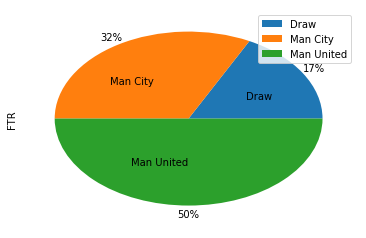

In [200]:
win_count = manchester_games[['FTR','Winner']].groupby('Winner').count()
win_count.plot.pie(subplots=True, autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.5)

In [205]:
win_count

,FTR
Winner,
Draw,7
Man City,13
Man United,20


**From the data above, 40 games were played between the two sides of which, Manchester City won 13 and United won 20. 7 games ended in draw**

## How many home goals did Man City score  against United?

In [210]:
mancity_home =  manchester_games[(manchester_games['HomeTeam'] == 'Man City')]
mancity_home = mancity_home.sort_values(by= 'Season')
mancity_home.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner
152,E0,7/11/1993,Man City,Man United,2,3,A,NaN,NaN,NaN,1993-94,Man United
758,E0,11/2/1995,Man City,Man United,0,3,A,NaN,NaN,NaN,1994-95,Man United
1250,E0,6/4/1996,Man City,Man United,2,3,A,1.0,2.0,A,1995-96,Man United
2957,E0,18/11/00,Man City,Man United,0,1,A,0.0,1.0,A,2000-01,Man United
3708,E0,9/11/2002,Man City,Man United,3,1,H,2.0,1.0,H,2002-03,Man City


In [25]:
total_home_goals = mancity_home['FTHG'].sum()
total_home_goals 

25

**Man City scored 23 home goals hosting United**

##  How many away goals did Man City score  against United?

In [560]:
mancity_away =  manchester_games[(manchester_games['AwayTeam'] == 'Man City')]
mancity_away = mancity_home.sort_values(by= 'Season')
mancity_away.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner
152,E0,7/11/1993,Man City,Man United,2,3,A,NaN,NaN,NaN,1993-94,Man United
758,E0,11/2/1995,Man City,Man United,0,3,A,NaN,NaN,NaN,1994-95,Man United
1250,E0,6/4/1996,Man City,Man United,2,3,A,1.0,2.0,A,1995-96,Man United
2957,E0,18/11/00,Man City,Man United,0,1,A,0.0,1.0,A,2000-01,Man United
3708,E0,9/11/2002,Man City,Man United,3,1,H,2.0,1.0,H,2002-03,Man City


In [27]:
total_away_goals = mancity_home['FTAG'].sum()
total_away_goals 

26

**Man City scored 23 away goals against United**